In [1]:
print("Hiran N MM21B030")

Hiran N MM21B030


# Question 1: Loading dataset

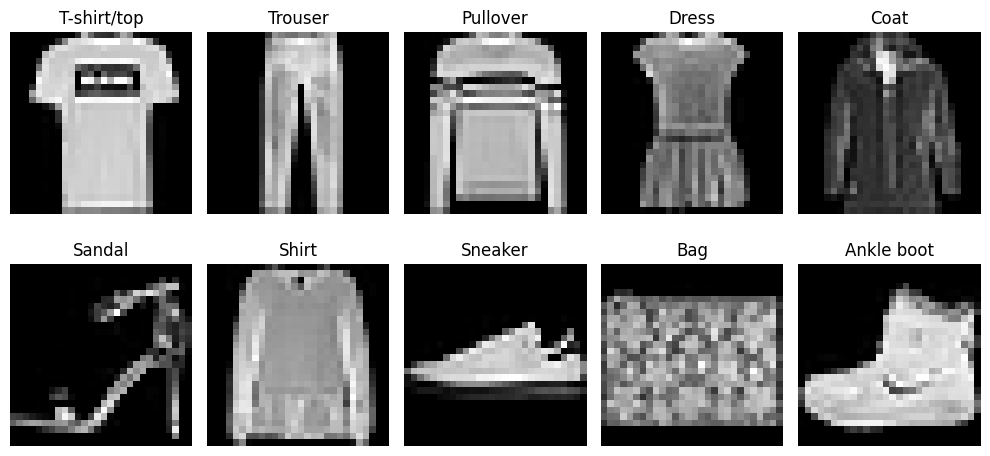

In [15]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Find one sample per class
sample_images = []
sample_labels = []

for class_id in range(10):
    index = np.where(y_train == class_id)[0][0]  # Get the first occurrence of the class
    sample_images.append(X_train[index])
    sample_labels.append(class_names[class_id])

# Plot images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(sample_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Normalising and reshaping X and y to ensure each data point is a column vector to be consistent with matrix calculation

X_train = X_train/255.0
X_test = X_test/255.0
X_train = np.array([x.reshape(-1, 1) for x in X_train])
X_test = np.array([x.reshape(-1, 1) for x in X_test])

num_classes = int(np.max(y_train)) + 1  # Convert to int

y_train = np.eye(num_classes)[y_train.astype(int)]  # Ensure indices are integers
y_train = np.array([each_y.reshape(-1, 1) for each_y in y_train])
y_test = np.eye(num_classes)[y_test.astype(int)]  # Ensure indices are integers
y_test = np.array([each_y.reshape(-1, 1) for each_y in y_test])

# Question 2: Feed Forward Neural Network

Can be found in model.py

# Question 3: Backpropogation with all the mentioned optimisation techniques

Can be found in model.py

The working of the model.py has been tested in the code block below.

In [5]:
import numpy as np
import importlib
import model  # Ensure model.py is imported
importlib.reload(model)  # Reload the module

from model import Model  # Import the class

# Create an object of the Model class with some example values
model = Model(
    num_hidden_layers=2,
    hidden_layer_size=[256, 256],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model.train(X_train, y_train, 10, 64)
y_hat = model.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))

print("Test accuracy:", test_acc)


Epoch number: 1

Epoch: 1, batch: 0/937 completed....Accuracy: 0.328125
Epoch: 1, batch: 100/937 completed....Accuracy: 0.828125
Epoch: 1, batch: 200/937 completed....Accuracy: 0.859375
Epoch: 1, batch: 300/937 completed....Accuracy: 0.765625
Epoch: 1, batch: 400/937 completed....Accuracy: 0.8125
Epoch: 1, batch: 500/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 600/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 700/937 completed....Accuracy: 0.84375
Epoch: 1, batch: 800/937 completed....Accuracy: 0.796875
Epoch: 1, batch: 900/937 completed....Accuracy: 0.84375
Epoch number: 2

Epoch: 2, batch: 0/937 completed....Accuracy: 0.84375
Epoch: 2, batch: 100/937 completed....Accuracy: 0.828125
Epoch: 2, batch: 200/937 completed....Accuracy: 0.890625
Epoch: 2, batch: 300/937 completed....Accuracy: 0.765625
Epoch: 2, batch: 400/937 completed....Accuracy: 0.859375
Epoch: 2, batch: 500/937 completed....Accuracy: 0.859375
Epoch: 2, batch: 600/937 completed....Accuracy: 0.875
Epoch: 2, b

# Question 4: Sweep

Strategy:

1. Perform first sweep with less parameters.


2. Run different optimizers and activation functions. For choice of optimizers lets stick to advanced algorithms ie Adam, RMSprop and nesterov


3. Fix 'xavier' weight initialization as its usually better than random 

**1st set of experiments:**

{

    "name": "1st set of experiments",

    "epochs": [5],

    "num_hidden_layers": [3],

    "hidden_layer_size": [64],

    "weight_decay": [0.5, 0.0005],

    "learning_rate": [0.001, 0.0001],

    "optimizer": ["Adam", "RMSprop", "nesterov"],

    "batch_size": [128],

    "weight_initialization": ["xavier"],

    "activation_functions": ["sigmoid", "tanh", "relu"]
}

In [4]:
!python sweep.py

2025-03-16 14:07:27.354351: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 14:07:27.354721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 14:07:27.357083: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 14:07:27.365679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742114247.379839    6865 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742114247.38

Results: 

1. Weight decay has negative correlation - Choose the one with least value ie 0.0005

2. Learning rate has positive correlation - Choose the one with high value 0.001

3. RMSprop and Adam performs better than nesterov

4. sigmoid has negative correlation with accuracy

Now fixing the optimizer as "RMSprop" and weight decay 0.0005 and tanh activation, look to increase the number of parameter space with higher hidden layer size and epochs, to scout for the best model

**2nd set of experiments**

{

    "name": "2nd set of experiments",

    "epochs": [10],

    "num_hidden_layers": [3],

    "hidden_layer_size": [64, 128],

    "weight_decay": [0.0005],

    "learning_rate": [0.001],

    "optimizer": ["RMSprop"],

    "batch_size": [32, 64, 128],

    "weight_initialization": ["xavier"],

    "activation_functions": ["tanh"]

}


In [5]:
!python sweep.py

2025-03-16 15:16:19.065665: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 15:16:19.066010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 15:16:19.068316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 15:16:19.075544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742118379.089938   13065 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742118379.09

# Question 5: Wandb report

The required plots have been added to the report

# Question 6: Inferences 

Best run: hl_3_hs_128_bs_128_ac_tanh_wd_0.0005_lr_0.001_opt_RMSprop_wi_xavier_ep_10

**Some inferences:**

1. sigmoid performs very poorly in some runs but decently well in others. Seems to be an issue with numerical stability ie for some initialisation and some set of parameters, it goes out of bounds.

2. 'Adam' and 'RMSprop' are the winners when it comes to optimizers

3. We had filtered certain parameters in the first run and varied the others in the second run. All the 6 configurations produced very good accuracy in the second run


**Source of error analysis:**

(from question 7's plot)

1. Shirt is being predicted as t-shirt and pullover

2. Coat is classified as pullover. 

These are reasonable errors since these classification as evident from the plot is slightly confusing for humans too..

**Recommendations for fine tuning:**

Can look for learning rates of 0.001 - 0.005 in steps of o.oo1 also,

Architecture-wise we have to test increasing parameters[256, 256, 256, 256], [512, 512, 512] etc.





# Question 7: Evaluating the best model

Confusion matrix and test accuracy are shown below. Also uploaded the confusion matrix on wandb

Model with 134794 parameters initialized...
Epoch number: 1

Epoch: 1, batch: 0/468 completed....Accuracy: 0.40625
Epoch: 1, batch: 100/468 completed....Accuracy: 0.859375
Epoch: 1, batch: 200/468 completed....Accuracy: 0.8359375
Epoch: 1, batch: 300/468 completed....Accuracy: 0.859375
Epoch: 1, batch: 400/468 completed....Accuracy: 0.7890625
Epoch number: 2

Epoch: 2, batch: 0/468 completed....Accuracy: 0.9375
Epoch: 2, batch: 100/468 completed....Accuracy: 0.875
Epoch: 2, batch: 200/468 completed....Accuracy: 0.8671875
Epoch: 2, batch: 300/468 completed....Accuracy: 0.890625
Epoch: 2, batch: 400/468 completed....Accuracy: 0.8515625
Epoch number: 3

Epoch: 3, batch: 0/468 completed....Accuracy: 0.953125
Epoch: 3, batch: 100/468 completed....Accuracy: 0.8828125
Epoch: 3, batch: 200/468 completed....Accuracy: 0.875
Epoch: 3, batch: 300/468 completed....Accuracy: 0.8984375
Epoch: 3, batch: 400/468 completed....Accuracy: 0.890625
Epoch number: 4

Epoch: 4, batch: 0/468 completed....Accura

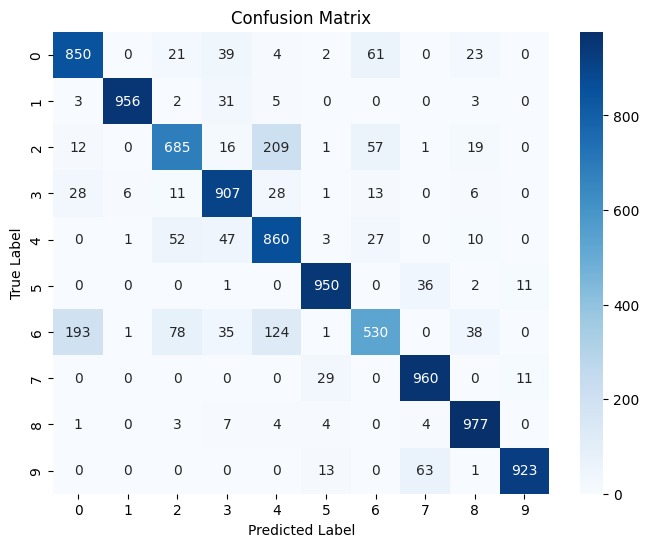

Test accuracy 0.8598


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import importlib
import model  # Ensure model.py is imported
importlib.reload(model)  # Reload the module

from model import Model  # Import the class

# Create an object of the Model class with some example values
model = Model(
    num_hidden_layers=3,
    hidden_layer_size=[128, 128, 128],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="RMSprop",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model.train(X_train, y_train, 10, 128)
y_hat = model.predict(X_test) 

# Convert predictions and ground truth from (10k, 10, 1) to (10k,)
y_pred = np.argmax(y_hat, axis=1).flatten()
y_true = np.argmax(y_test, axis=1).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))

print("Test accuracy", test_acc)


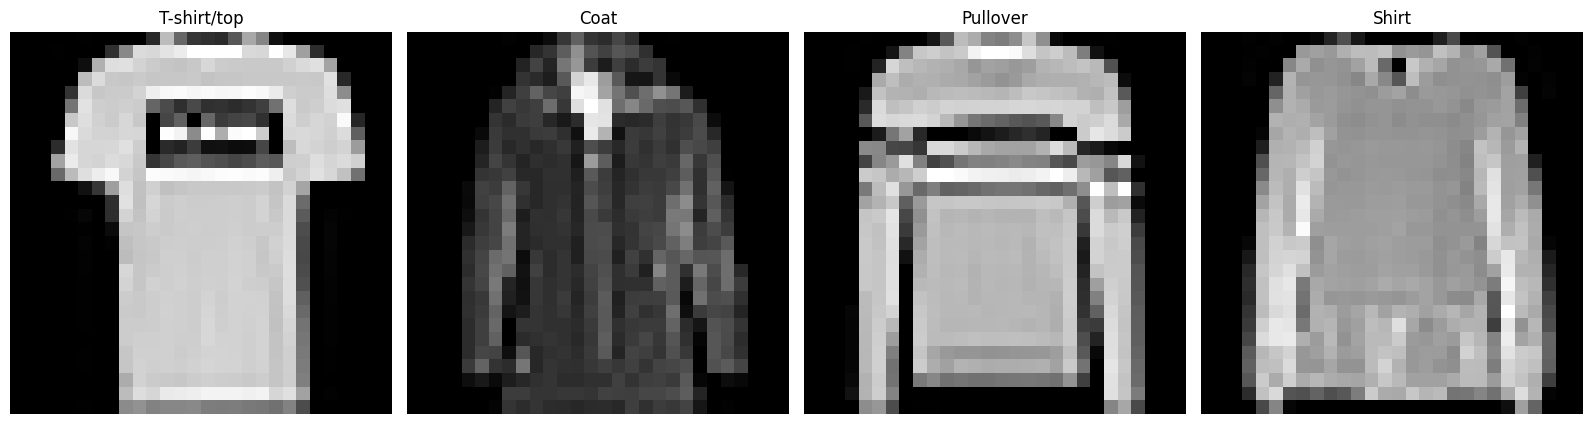

In [ ]:
# Sources of error: 

# 6 is being predicted as 0 and 4

# 2 is also being predicted as 4

# Let's visualise 0 4 2 6

from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Find one sample per class
sample_images = []
sample_labels = []

for class_id in [0, 4, 2, 6]:
    index = np.where(y_train == class_id)[0][0]  # Get the first occurrence of the class
    sample_images.append(X_train[index])
    sample_labels.append(class_names[class_id])

# Plot images
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(sample_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
y_test = np.eye(num_classes)[y_test.astype(int)]  # Ensure indices are integers
y_test = np.array([each_y.reshape(-1, 1) for each_y in y_test])
import wandb
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
run = wandb.init(project="DL") 
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                        y_true=list(np.argmax(y_test, axis = 1).flatten()), preds=list(np.argmax(y_hat, axis=1).flatten()),
                        class_names=fashion_mnist_labels)})
run.finish()

# Question 8: MSE vs Cross-entropy

Model with 134794 parameters initialized...
Epoch number: 1

Epoch: 1, batch: 0/468 completed....Accuracy: 0.3515625
Epoch: 1, batch: 100/468 completed....Accuracy: 0.8359375
Epoch: 1, batch: 200/468 completed....Accuracy: 0.84375
Epoch: 1, batch: 300/468 completed....Accuracy: 0.875
Epoch: 1, batch: 400/468 completed....Accuracy: 0.84375
Epoch number: 2

Epoch: 2, batch: 0/468 completed....Accuracy: 0.8984375
Epoch: 2, batch: 100/468 completed....Accuracy: 0.859375
Epoch: 2, batch: 200/468 completed....Accuracy: 0.859375
Epoch: 2, batch: 300/468 completed....Accuracy: 0.8828125
Epoch: 2, batch: 400/468 completed....Accuracy: 0.8515625
Test accuracy for cross-entropy: 0.8463
Model with 134794 parameters initialized...
Epoch number: 1

Epoch: 1, batch: 0/468 completed....Accuracy: 0.2734375
Epoch: 1, batch: 100/468 completed....Accuracy: 0.8359375
Epoch: 1, batch: 200/468 completed....Accuracy: 0.84375
Epoch: 1, batch: 300/468 completed....Accuracy: 0.8828125
Epoch: 1, batch: 400/468 co

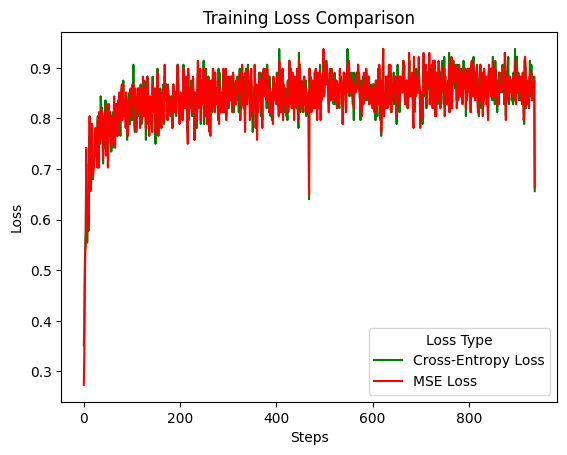

In [18]:
import numpy as np
import importlib
import model  # Ensure model.py is imported
importlib.reload(model)  # Reload the module
import matplotlib.pyplot as plt
from model import Model  # Import the class


model_cross = Model(
    num_hidden_layers=3,
    hidden_layer_size=[128, 128, 128],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model_cross.train(X_train, y_train, 2, 128)
y_hat = model_cross.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))
training_losses_cross = model_cross.training_loss
print("Test accuracy for cross-entropy:", test_acc)



model_MSE = Model(
    num_hidden_layers=3,
    hidden_layer_size=[128, 128, 128],  # Example list for layer sizes
    weight_decay=0.0005,
    learning_rate=0.001,
    optimizer="Adam",
    activation="tanh",
    weight_init="xavier",
    loss = 'cross-entropy'
)


model_MSE.train(X_train, y_train, 2, 128)
y_hat = model_MSE.predict(X_test) 
test_acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y_test, axis=1))
training_losses_MSE = model_MSE.training_loss
print("Test accuracy for MSE loss:", test_acc)

plt.plot(training_losses_cross, 'g-', label='Cross-Entropy Loss')
plt.plot(training_losses_MSE, 'r-', label='MSE Loss')

plt.xlabel('Steps')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Comparison')  # Title of the plot
plt.legend(title='Loss Type')  # Add legend with title

plt.show()


ValueError: x and y must be the same size

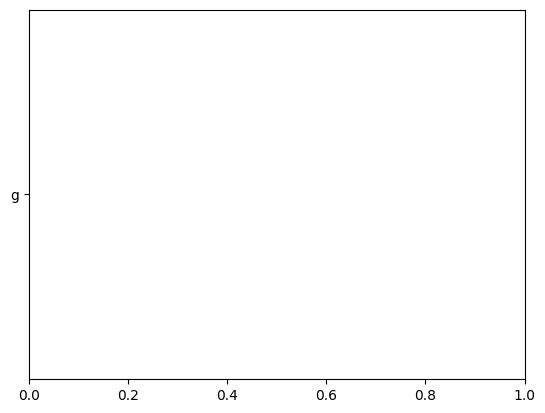

In [19]:
plt.scatter(training_losses_cross, 'g', label='Cross-Entropy Loss')
plt.scatter(training_losses_MSE, 'r', label='MSE Loss')

plt.xlabel('Steps')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Comparison')  # Title of the plot
plt.legend(title='Loss Type')  # Add legend with title

plt.show()

# Question 9: git push

The project can be found in the git repo: *https://github.com/Hiran03/NN_from_scratch*

# Question 10: Experiments on MNIST

Rationale behind choice of hyperparameters. 

# Self Declaration

I, Hiran N (MM21B030), swear on my honour that I have written the code and the report by myself and have not copied it from the internet or other students.